In [1]:
# Standand libraries for DS

import pandas as pd
from sklearn.utils import shuffle
import pickle
import requests

# Plotting

import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading data

db_raw = pd.read_csv("data/students-performance.csv")

# Changing columns name to snake_case

db_raw.rename(columns={"race/ethnicity": "ethnicity",
    "parental level of education": "parental_education",
    "test preparation course": "test_preparation",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"}, inplace=True)

db_raw = db_raw.loc[(db_raw["math_score"] >= 20) & (db_raw["reading_score"] >= 20) & (db_raw["writing_score"] >= 20)]
print(db_raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              994 non-null    object
 1   ethnicity           994 non-null    object
 2   parental_education  994 non-null    object
 3   lunch               994 non-null    object
 4   test_preparation    994 non-null    object
 5   math_score          994 non-null    int64 
 6   reading_score       994 non-null    int64 
 7   writing_score       994 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.9+ KB
None


In [3]:
db = db_raw.copy()

for column in ["math_score", "reading_score", "writing_score"]: 
    
    category = pd.cut(db[column],bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], 
    labels=[30, 40, 50, 60, 70, 80, 90, 100])

    db.drop(column, axis=1, inplace=True)
    db.insert(len(db.columns), column, category)

db.head()

,gender,ethnicity,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,80,80,80
1,female,group C,some college,standard,completed,70,90,90
2,female,group B,master's degree,standard,none,90,100,100
3,male,group A,associate's degree,free/reduced,none,50,60,50
4,male,group C,some college,standard,none,80,80,80


Text(0.5, 0, 'Gender')

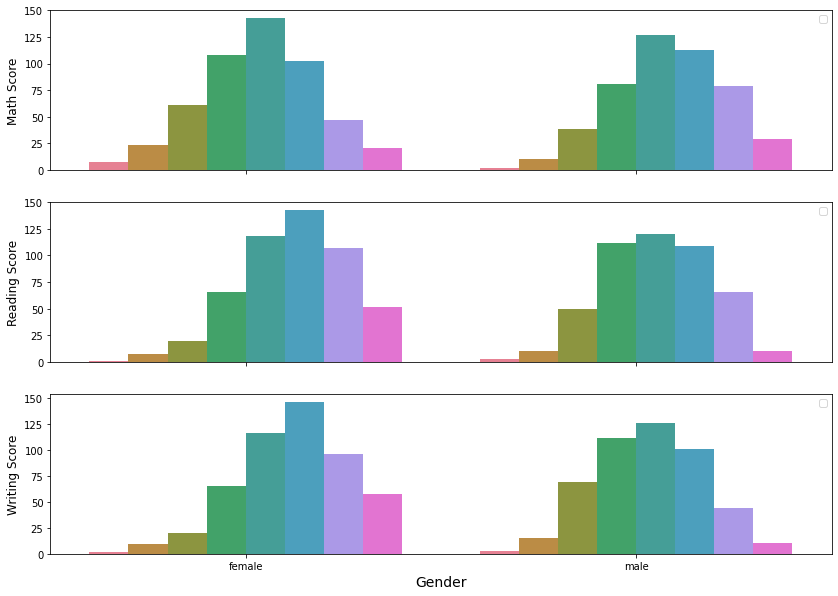

In [4]:
fig = plt.figure(figsize=(14,10))
plt.title('Score by Gender', fontsize=17)

# math
ax1 = plt.subplot(311)
ax1 = sns.countplot(data=db, x='gender', hue='math_score', 
    palette='husl', order = db['gender'].value_counts(ascending=False).index)
plt.legend([])
ax1.set_ylabel('Math Score', fontsize=12)
ax1.set_xlabel('', fontsize=12)
plt.setp(ax1.get_xticklabels(), visible=False)

# reading
ax2 = plt.subplot(312, sharex=ax1)
ax2 = sns.countplot(data=db, x='gender', hue='reading_score', 
    palette='husl', order = db['gender'].value_counts(ascending=False).index)
plt.legend([])
ax2.set_ylabel('Reading Score', fontsize=12)
ax2.set_xlabel('', fontsize=12)
plt.setp(ax2.get_xticklabels(), visible=False)

# writing
ax3 = plt.subplot(313, sharex=ax1)
ax3 = sns.countplot(data=db, x='gender', hue='writing_score', 
    palette='husl', order = db['gender'].value_counts(ascending=False).index)
plt.legend([])
ax3.set_ylabel('Writing Score', fontsize=12)
ax3.set_xlabel('Gender', fontsize=14)

Text(0.5, 0, 'Ethnicity')

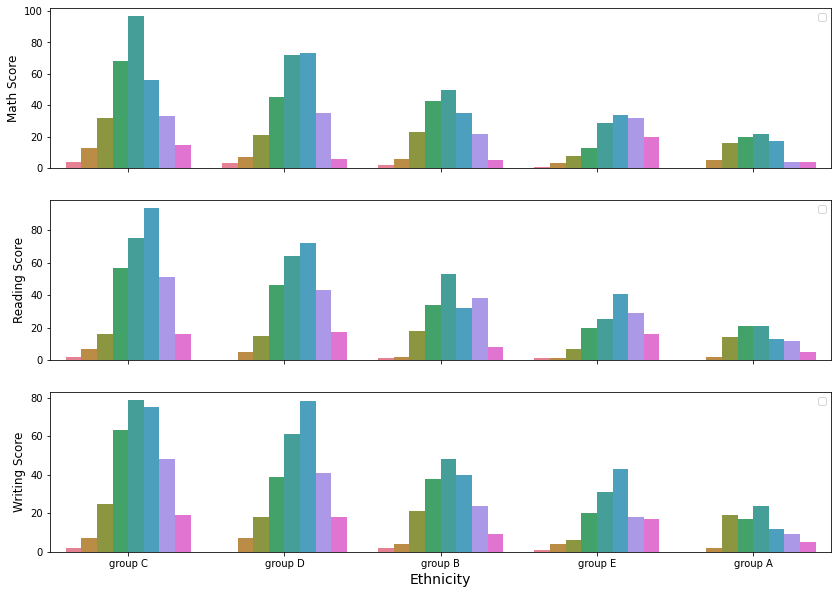

In [5]:
fig = plt.figure(figsize=(14,10))
plt.title('Score by ethnicity', fontsize=17)

# math
ax1 = plt.subplot(311)
ax1 = sns.countplot(data=db, x='ethnicity', hue='math_score', 
    palette='husl', order = db['ethnicity'].value_counts(ascending=False).index)
plt.legend([])
ax1.set_ylabel('Math Score', fontsize=12)
ax1.set_xlabel('', fontsize=12)
plt.setp(ax1.get_xticklabels(), visible=False)

# reading
ax2 = plt.subplot(312, sharex=ax1)
ax2 = sns.countplot(data=db, x='ethnicity', hue='reading_score', 
    palette='husl', order = db['ethnicity'].value_counts(ascending=False).index)
plt.legend([])
ax2.set_ylabel('Reading Score', fontsize=12)
ax2.set_xlabel('', fontsize=12)
plt.setp(ax2.get_xticklabels(), visible=False)

# writing
ax3 = plt.subplot(313, sharex=ax1)
ax3 = sns.countplot(data=db, x='ethnicity', hue='writing_score', 
    palette='husl', order = db['ethnicity'].value_counts(ascending=False).index)
plt.legend([])
ax3.set_ylabel('Writing Score', fontsize=12)
ax3.set_xlabel('Ethnicity', fontsize=14)

Text(0.5, 0, 'Parental Education')

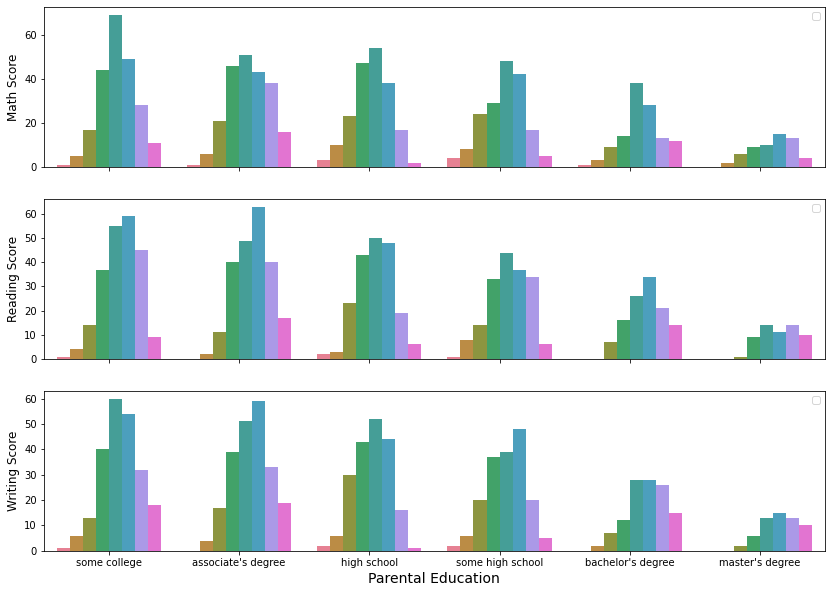

In [6]:

fig = plt.figure(figsize=(14,10))
plt.title('Score by parental_education', fontsize=17)

# math
ax1 = plt.subplot(311)
ax1 = sns.countplot(data=db, x='parental_education', hue='math_score', 
    palette='husl', order = db['parental_education'].value_counts(ascending=False).index)
plt.legend([])
ax1.set_ylabel('Math Score', fontsize=12)
ax1.set_xlabel('', fontsize=12)
plt.setp(ax1.get_xticklabels(), visible=False)

# reading
ax2 = plt.subplot(312, sharex=ax1)
ax2 = sns.countplot(data=db, x='parental_education', hue='reading_score', 
    palette='husl', order = db['parental_education'].value_counts(ascending=False).index)
plt.legend([])
ax2.set_ylabel('Reading Score', fontsize=12)
ax2.set_xlabel('', fontsize=12)
plt.setp(ax2.get_xticklabels(), visible=False)

# writing
ax3 = plt.subplot(313, sharex=ax1)
ax3 = sns.countplot(data=db, x='parental_education', hue='writing_score', 
    palette='husl', order = db['parental_education'].value_counts(ascending=False).index)
plt.legend([])
ax3.set_ylabel('Writing Score', fontsize=12)
ax3.set_xlabel('Parental Education', fontsize=14)

Text(0.5, 0, 'Lunch')

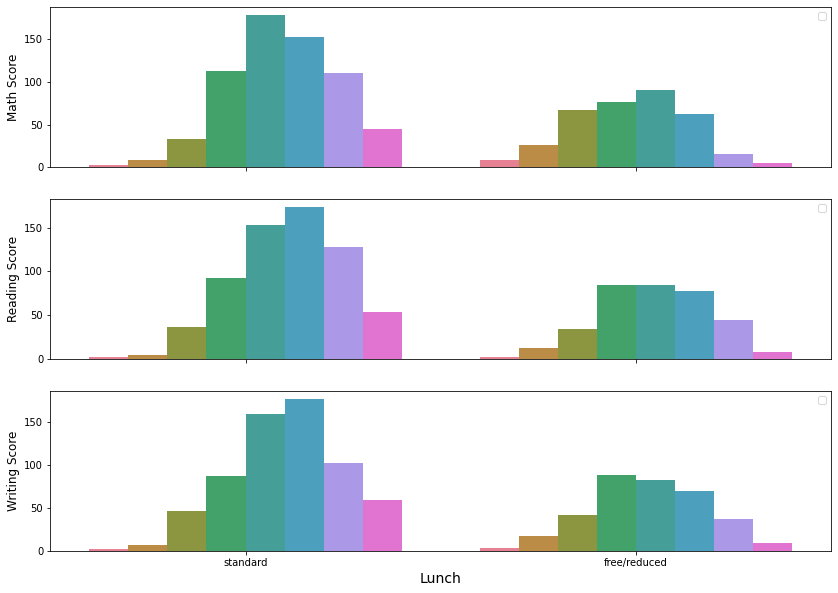

In [7]:
fig = plt.figure(figsize=(14,10))
plt.title('Score by Lunch', fontsize=17)

# math
ax1 = plt.subplot(311)
ax1 = sns.countplot(data=db, x='lunch', hue='math_score', 
    palette='husl', order = db['lunch'].value_counts(ascending=False).index)
plt.legend([])
ax1.set_ylabel('Math Score', fontsize=12)
ax1.set_xlabel('', fontsize=12)
plt.setp(ax1.get_xticklabels(), visible=False)

# reading
ax2 = plt.subplot(312, sharex=ax1)
ax2 = sns.countplot(data=db, x='lunch', hue='reading_score', 
    palette='husl', order = db['lunch'].value_counts(ascending=False).index)
plt.legend([])
ax2.set_ylabel('Reading Score', fontsize=12)
ax2.set_xlabel('', fontsize=12)
plt.setp(ax2.get_xticklabels(), visible=False)

# writing
ax3 = plt.subplot(313, sharex=ax1)
ax3 = sns.countplot(data=db, x='lunch', hue='writing_score', 
    palette='husl', order = db['lunch'].value_counts(ascending=False).index)
plt.legend([])
ax3.set_ylabel('Writing Score', fontsize=12)
ax3.set_xlabel('Lunch', fontsize=14)

Text(0.5, 0, 'Test Preparation')

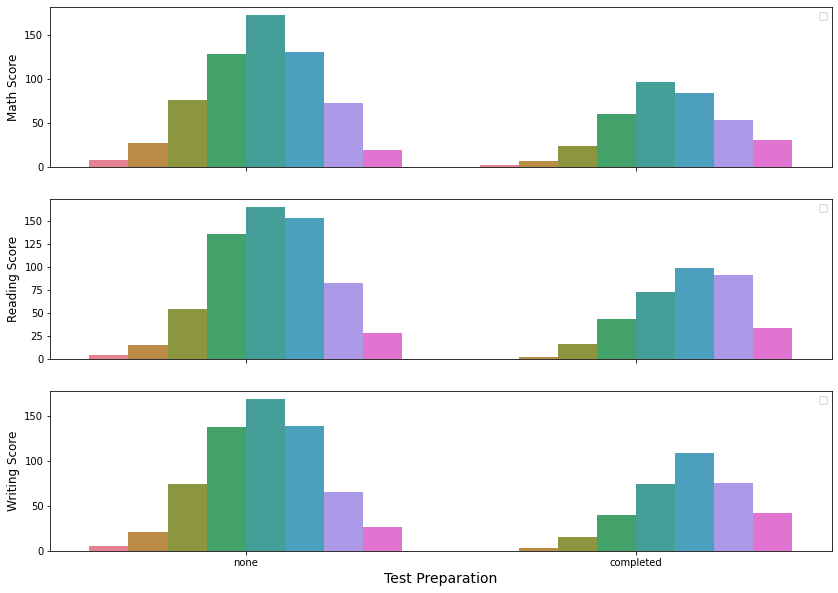

In [8]:
fig = plt.figure(figsize=(14,10))
plt.title('Score by Test Preparation', fontsize=17)

# math
ax1 = plt.subplot(311)
ax1 = sns.countplot(data=db, x='test_preparation', hue='math_score', 
    palette='husl', order = db['test_preparation'].value_counts(ascending=False).index)
plt.legend([])
ax1.set_ylabel('Math Score', fontsize=12)
ax1.set_xlabel('', fontsize=12)
plt.setp(ax1.get_xticklabels(), visible=False)

# reading
ax2 = plt.subplot(312, sharex=ax1)
ax2 = sns.countplot(data=db, x='test_preparation', hue='reading_score', 
    palette='husl', order = db['test_preparation'].value_counts(ascending=False).index)
plt.legend([])
ax2.set_ylabel('Reading Score', fontsize=12)
ax2.set_xlabel('', fontsize=12)
plt.setp(ax2.get_xticklabels(), visible=False)

# writing
ax3 = plt.subplot(313, sharex=ax1)
ax3 = sns.countplot(data=db, x='test_preparation', hue='writing_score', 
    palette='husl', order = db['test_preparation'].value_counts(ascending=False).index)
plt.legend([])
ax3.set_ylabel('Writing Score', fontsize=12)
ax3.set_xlabel('Test Preparation', fontsize=14)

In [9]:
db = db_raw.copy()

profiles = []

for ethnicity in db["ethnicity"].unique():
    for parental_education in db["parental_education"].unique():
        for lunch in db["lunch"].unique():
            profiles.append({"ethnicity": ethnicity, 
                "parental_education": parental_education,
                "lunch": lunch})

In [10]:
for i in range(len(profiles)):
    profile = db.loc[(db['ethnicity'] == profiles[i]['ethnicity']) 
        & (db['parental_education'] == profiles[i]['parental_education'])
        & (db['lunch'] == profiles[i]['lunch'])]
    
    profiles[i]["math_score"] = profile["math_score"].mean()
    profiles[i]["reading_score"] = profile["reading_score"].mean()
    profiles[i]["writing_score"] = profile["writing_score"].mean()
    profiles[i]["mean_score"] = (profile["math_score"].mean() 
        + profile["reading_score"].mean() 
        + profile["writing_score"].mean())/3

In [11]:
df = pd.DataFrame(data=profiles)
df = df.sort_values(by=['mean_score'])
df = df.reset_index().drop("index", axis=1)
display(df.head(60))

,ethnicity,parental_education,lunch,math_score,reading_score,writing_score,mean_score
0,group A,master's degree,standard,50.000000,53.000000,58.000000,53.666667
1,group C,high school,free/reduced,50.043478,58.173913,54.695652,54.304348
2,group A,some high school,free/reduced,54.454545,58.545455,53.909091,55.636364
3,group A,high school,free/reduced,54.571429,57.571429,55.000000,55.714286
4,group D,some high school,free/reduced,53.307692,58.615385,57.923077,56.615385
5,group A,associate's degree,free/reduced,53.000000,64.000000,59.142857,58.714286
6,group C,some high school,free/reduced,56.150000,62.450000,59.950000,59.516667
7,group B,some college,free/reduced,57.625000,61.437500,59.750000,59.604167
8,group B,some high school,free/reduced,54.444444,64.111111,62.333333,60.296296
9,group B,high school,free/reduced,55.428571,64.214286,61.357143,60.333333
